In [ ]:
# for jupyter online uploaded only
import zipfile

f = zipfile.ZipFile('data.zip','r')
for file in f.namelist():
    f.extract(file,'/ML-1M/')
f.close()

# NCF (packed)

In [1]:
import numpy as np
import pandas as pd
from libreco.data import random_split, DatasetPure
from libreco.algorithms import NCF  # pure data, 
from libreco.evaluation import evaluate



Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# data extract and split
data = pd.read_csv("ratings.csv")
data.columns = ["user", "item", "label", "time"]

train_data, eval_data, test_data = random_split(data, multi_ratios=[0.8, 0.1, 0.1])

In [4]:
# make data compatible with libreco
train_data, data_info= DatasetPure.build_trainset(train_data)
eval_data = DatasetPure.build_evalset(eval_data)
test_data = DatasetPure.build_testset(test_data)

In [5]:
ncf = NCF(
    task="rating",
    data_info=data_info,
    loss_type="cross_entropy",
    embed_size=16,
    n_epochs=10,
    lr=1e-3,
    batch_size=2048,
    num_neg=1,
)

In [6]:
# monitor metrics on eval data during training
ncf.fit(
    train_data,
    neg_sampling=False, #for rating, this param is false else True
    verbose=2,
    eval_data=eval_data,
    metrics=["loss"],
)

# do final evaluation on test data
evaluate(
    model=ncf,
    data=test_data,
    neg_sampling=False,
    metrics=["loss"],
)

Training start time: 2024-12-04 16:33:00


C:\Users\bao'bao'mao\AppData\Roaming\Python\Python310\site-packages\libreco\layers\dense.py:31: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


2024-12-04 16:33:01,655 - WARNING - From C:\Users\bao'bao'mao\AppData\Roaming\Python\Python310\site-packages\keras\src\utils\version_utils.py:76: The name tf.executing_eagerly_outside_functions is deprecated. Please use tf.compat.v1.executing_eagerly_outside_functions instead.



Instructions for updating:
Colocations handled automatically by placer.


2024-12-04 16:33:01,811 - WARNING - From C:\Users\bao'bao'mao\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\normalization\batch_normalization.py:883: _colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
C:\Users\bao'bao'mao\AppData\Roaming\Python\Python310\site-packages\libreco\layers\dense.py:39: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  net = tf.layers.batch_normalization(net, training=is_training)


2024-12-04 16:33:02,794 - WARNING - From C:\Users\bao'bao'mao\AppData\Roaming\Python\Python310\site-packages\libreco\training\tf_trainer.py:120: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

train: 100%|██████████| 79/79 [00:02<00:00, 29.27it/s]


Epoch 1 elapsed: 2.708s
	 train_loss: 8.3543


eval_pointwise: 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]


	 eval rmse: 1.0240


train: 100%|██████████| 79/79 [00:01<00:00, 41.90it/s]


Epoch 2 elapsed: 1.899s
	 train_loss: 0.8825


eval_pointwise: 100%|██████████| 2/2 [00:00<00:00, 49.97it/s]


	 eval rmse: 1.0802


train: 100%|██████████| 79/79 [00:02<00:00, 37.14it/s]


Epoch 3 elapsed: 2.143s
	 train_loss: 0.5949


eval_pointwise: 100%|██████████| 2/2 [00:00<00:00, 47.59it/s]


	 eval rmse: 1.0813


train: 100%|██████████| 79/79 [00:02<00:00, 36.73it/s]


Epoch 4 elapsed: 2.166s
	 train_loss: 0.4909


eval_pointwise: 100%|██████████| 2/2 [00:00<00:00, 53.27it/s]


	 eval rmse: 1.0537


train: 100%|██████████| 79/79 [00:01<00:00, 41.31it/s]


Epoch 5 elapsed: 1.922s
	 train_loss: 0.4393


eval_pointwise: 100%|██████████| 2/2 [00:00<00:00, 48.13it/s]


	 eval rmse: 1.0423


train: 100%|██████████| 79/79 [00:01<00:00, 47.16it/s]


Epoch 6 elapsed: 1.689s
	 train_loss: 0.4067


eval_pointwise: 100%|██████████| 2/2 [00:00<00:00, 68.97it/s]


	 eval rmse: 1.0123


train: 100%|██████████| 79/79 [00:01<00:00, 45.39it/s]


Epoch 7 elapsed: 1.752s
	 train_loss: 0.3805


eval_pointwise: 100%|██████████| 2/2 [00:00<00:00, 60.61it/s]


	 eval rmse: 0.9742


train: 100%|██████████| 79/79 [00:01<00:00, 46.08it/s]


Epoch 8 elapsed: 1.726s
	 train_loss: 0.3581


eval_pointwise: 100%|██████████| 2/2 [00:00<00:00, 67.71it/s]


	 eval rmse: 0.9666


train: 100%|██████████| 79/79 [00:01<00:00, 46.07it/s]


Epoch 9 elapsed: 1.726s
	 train_loss: 0.346


eval_pointwise: 100%|██████████| 2/2 [00:00<00:00, 41.17it/s]


	 eval rmse: 0.9689


train: 100%|██████████| 79/79 [00:02<00:00, 38.91it/s]


Epoch 10 elapsed: 2.041s
	 train_loss: 0.3307


eval_pointwise: 100%|██████████| 2/2 [00:00<00:00, 49.30it/s]


	 eval rmse: 0.9910


eval_pointwise: 100%|██████████| 2/2 [00:00<00:00, 61.68it/s]


{'loss': 1.0128553}

In [ ]:
# predict preference of user 575 to item 10
ncf.predict(user=575, item=10)

# recommend 10items for user 5755
ncf_reco_result = ncf.recommend_user(user=575, n_rec=10)

{575: array([   940,   3819, 179133,   4658,   1023,   1041,   2423,   3468,
          1125,  86911], dtype=int64)}

In [ ]:
# from sklearn.metrics import ndcg_score

# # Since we have already sorted our recommendations
# # An array that represent our recommendation scores is used.
# representative_array = [[i for i in range(k, 0, -1)]] * len(transformer_reco_results)

# trans_score, popular_score = [], []
# for k in range(1,10):
#   transformer_result = ndcg_score(transformer_reco_results,
#                                   representative_array, k=k)
#   popular_result = ndcg_score(popular_reco_results,
#                               representative_array, k=k)
  
#   trans_score.append(transformer_result)
#   popular_score.append(popular_result)
#   print(f"Transformer NDCG result at top {k}: {round(transformer_result, 4)}")
#   print(f"Popular recommendation NDCG result at top {k}: {round(popular_result, 4)}\n\n")

# Transformer

In [34]:
import torchtext

In [7]:
import time
import math
import os
from tempfile import TemporaryDirectory
from typing import Tuple

import torch
from torch import nn, Tensor
from torch.nn import TransformerEncoder, TransformerEncoderLayer
from torch.utils.data import dataset
from torchtext.vocab import vocab
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence

from collections import Counter

from zipfile import ZipFile
from urllib.request import urlretrieve
from libreco.data import random_split

import pandas as pd
import numpy as np

## Data preparation

In [2]:
# Loading dataset

users = pd.read_csv(
    "users.dat",
    sep="::",
    names=["user_id", "sex", "age_group", "occupation", "zip_code"],
)

ratings = pd.read_csv(
    "ratings.dat",
    sep="::",
    names=["user_id", "movie_id", "rating", "unix_timestamp"],
)

movies = pd.read_csv(
    "movies.dat", sep="::", names=["movie_id", "title", "genres"], encoding='latin-1'
)

C:\Users\bao'bao'mao\AppData\Local\Temp\ipykernel_15716\620852954.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv(
C:\Users\bao'bao'mao\AppData\Local\Temp\ipykernel_15716\620852954.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv(
C:\Users\bao'bao'mao\AppData\Local\Temp\ipykernel_15716\620852954.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read

In [3]:
# Preventing ids to be written as integer or float data type
users["user_id"] = users["user_id"].apply(lambda x: f"user_{x}")
movies["movie_id"] = movies["movie_id"].apply(lambda x: f"movie_{x}")
ratings["movie_id"] = ratings["movie_id"].apply(lambda x: f"movie_{x}")
ratings["user_id"] = ratings["user_id"].apply(lambda x: f"user_{x}")

In [4]:
# Creating Vocabulary
# Genarting a list of unique movie ids
movie_ids = movies.movie_id.unique()

# Counter is used to feed movies to movive_vocab
movie_counter = Counter(movie_ids)

# Genarting vocabulary
movie_vocab = vocab(movie_counter, specials=['<unk>'])

# For indexing input ids
movie_vocab_stoi = movie_vocab.get_stoi()

# Movie to title mapping dictionary
movie_title_dict = dict(zip(movies.movie_id, movies.title))

# Similarly generating a vocabulary for user ids
user_ids = ratings.user_id.unique()
user_counter = Counter(user_ids)
user_vocab = vocab(user_counter, specials=['<unk>'])
user_vocab_stoi = user_vocab.get_stoi()
print(user_vocab_stoi)

{'user_682': 682, 'user_1971': 1971, 'user_60': 60, 'user_1607': 1607, 'user_11': 11, 'user_1320': 1320, 'user_130': 130, 'user_3021': 3021, 'user_5319': 5319, 'user_1492': 1492, 'user_1089': 1089, 'user_620': 620, 'user_2581': 2581, 'user_307': 307, 'user_4': 4, 'user_141': 141, 'user_2062': 2062, 'user_985': 985, 'user_3469': 3469, 'user_2853': 2853, 'user_5759': 5759, '<unk>': 0, 'user_3353': 3353, 'user_1504': 1504, 'user_29': 29, 'user_1444': 1444, 'user_258': 258, 'user_3622': 3622, 'user_2449': 2449, 'user_1602': 1602, 'user_14': 14, 'user_1325': 1325, 'user_135': 135, 'user_3024': 3024, 'user_1497': 1497, 'user_625': 625, 'user_2584': 2584, 'user_302': 302, 'user_1': 1, 'user_144': 144, 'user_2067': 2067, 'user_2856': 2856, 'user_889': 889, 'user_980': 980, 'user_136': 136, 'user_3027': 3027, 'user_5025': 5025, 'user_529': 529, 'user_1708': 1708, 'user_1601': 1601, 'user_17': 17, 'user_1326': 1326, 'user_1494': 1494, 'user_626': 626, 'user_2587': 2587, 'user_301': 301, 'user_20

In [5]:
# Group ratings by user_id in order of increasing unix_timestamp.
ratings_group = ratings.sort_values(by=["unix_timestamp"]).groupby("user_id")

ratings_data = pd.DataFrame(
    data={
        "user_id": list(ratings_group.groups.keys()),
        "movie_ids": list(ratings_group.movie_id.apply(list)),
        "timestamps": list(ratings_group.unix_timestamp.apply(list)),
    }
)

# Sequence length, min history count and window slide size
sequence_length = 4
min_history = 1
step_size = 2

# Creating sequences from lists with sliding window
def create_sequences(values, window_size, step_size, min_history):
  sequences = []
  start_index = 0
  while len(values[start_index:]) > min_history:
    seq = values[start_index : start_index + window_size]
    sequences.append(seq)
    start_index += step_size
  return sequences

ratings_data.movie_ids = ratings_data.movie_ids.apply(
    lambda ids: create_sequences(ids, sequence_length, step_size, min_history)
)

del ratings_data["timestamps"]

# Sub-sequences are exploded.
# Since there might be more than one sequence for each user.
ratings_data_transformed = ratings_data[["user_id", "movie_ids"]].explode(
    "movie_ids", ignore_index=True
)

ratings_data_transformed.rename(
    columns={"movie_ids": "sequence_movie_ids"},
    inplace=True,
)

In [6]:
print(ratings_data_transformed)

         user_id                                sequence_movie_ids
0         user_1  [movie_3186, movie_1721, movie_1270, movie_1022]
1         user_1  [movie_1270, movie_1022, movie_2340, movie_1836]
2         user_1  [movie_2340, movie_1836, movie_3408, movie_1207]
3         user_1   [movie_3408, movie_1207, movie_2804, movie_260]
4         user_1    [movie_2804, movie_260, movie_720, movie_1193]
...          ...                                               ...
498618  user_999   [movie_2676, movie_2540, movie_1363, movie_765]
498619  user_999   [movie_1363, movie_765, movie_3565, movie_1410]
498620  user_999  [movie_3565, movie_1410, movie_2269, movie_2504]
498621  user_999    [movie_2269, movie_2504, movie_455, movie_193]
498622  user_999                            [movie_455, movie_193]

[498623 rows x 2 columns]


In [31]:
# Random indexing
np.random.seed(24)
random_range = np.random.rand(len(ratings_data_transformed.index))
random_selection_1 = random_range <= 0.7
random_selection_2 = (0.7<random_range) & (random_range<0.85)
random_selection_3 = 0.85 < random_range

# Split train data
df_train_data = ratings_data_transformed[random_selection_1]
train_data_raw = df_train_data[["user_id", "sequence_movie_ids"]].values

# Split validation data
df_val_data = ratings_data_transformed[random_selection_2]
val_data_raw = df_val_data[["user_id", "sequence_movie_ids"]].values

# Split validation data
df_test_data = ratings_data_transformed[random_selection_3]
test_data_raw = df_test_data[["user_id", "sequence_movie_ids"]].values

In [ ]:
# Pytorch Dataset for user interactions
class MovieSeqDataset(Dataset):
    # Initialize dataset
    def __init__(self, data, movie_vocab_stoi, user_vocab_stoi):
        self.data = data
        self.movie_vocab_stoi = movie_vocab_stoi
        self.user_vocab_stoi = user_vocab_stoi


    def __len__(self):
        return len(self.data)

    # Fetch data from the dataset
    def __getitem__(self, idx):
        user, movie_sequence = self.data[idx]
        # Directly index into the vocabularies
        movie_data = [self.movie_vocab_stoi[item] for item in movie_sequence]
        user_data = self.user_vocab_stoi[user]
        return torch.tensor(movie_data), torch.tensor(user_data)


# Collate function and padding
def collate_batch(batch):
    movie_list = [item[0] for item in batch]
    user_list = [item[1] for item in batch]
    return pad_sequence(movie_list, padding_value=movie_vocab_stoi['<unk>'], batch_first=True), torch.stack(user_list)


BATCH_SIZE = 256
# Create instances of your Dataset for each set
train_dataset = MovieSeqDataset(train_data_raw, movie_vocab_stoi, user_vocab_stoi)
val_dataset = MovieSeqDataset(val_data_raw, movie_vocab_stoi, user_vocab_stoi)
test_dataset = MovieSeqDataset(test_data_raw, movie_vocab_stoi, user_vocab_stoi)
# Create DataLoaders
train_iter = DataLoader(train_dataset, batch_size=BATCH_SIZE,
                        shuffle=True, collate_fn=collate_batch)
val_iter = DataLoader(val_dataset, batch_size=BATCH_SIZE,
                      shuffle=False, collate_fn=collate_batch)
test_iter = DataLoader(test_dataset, batch_size=BATCH_SIZE,
                      shuffle=False, collate_fn=collate_batch)

In [10]:
print(train_dataset)

In [ ]:
user, movie_sequence = train_data_raw[0]
# Directly index into the vocabularies
print(train_data_raw[0])
print(movie_sequence)
movie_data = [movie_vocab_stoi[item] for item in movie_sequence] # movie number
user_data = user_vocab_stoi[user] # user number
print(movie_data, user_data)

['user_1' list(['movie_3186', 'movie_1721', 'movie_1270', 'movie_1022'])]
['movie_3186', 'movie_1721', 'movie_1270', 'movie_1022']
[3118, 1673, 1251, 1010] 1


## Model definition

In [12]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)

        # `div_term` is used in the calculation of the sinusoidal values.
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        
        # Initializing positional encoding matrix with zeros.
        pe = torch.zeros(max_len, 1, d_model)

        # Calculating the positional encodings.
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: Tensor) -> Tensor:
        """
        Arguments:
            x: Tensor, shape ``[seq_len, batch_size, embedding_dim]``
        """
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)

In [13]:
class TransformerModel(nn.Module):
    def __init__(self, ntoken: int, nuser: int, d_model: int, nhead: int, d_hid: int,
                 nlayers: int, dropout: float = 0.5):
        super().__init__()
        self.model_type = 'Transformer'
        # positional encoder
        self.pos_encoder = PositionalEncoding(d_model, dropout)

        # Multihead attention mechanism.
        encoder_layers = TransformerEncoderLayer(d_model, nhead, d_hid, dropout)
        self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)

        # Embedding layers
        self.movie_embedding = nn.Embedding(ntoken, d_model)
        self.user_embedding = nn.Embedding(nuser, d_model)

        # Defining the size of the input to the model.
        self.d_model = d_model

        # Linear layer to map the output tomovie vocabulary.
        self.linear = nn.Linear(2*d_model, ntoken)

        self.init_weights()

    def init_weights(self) -> None:
        # Initializing the weights of the embedding and linear layers.
        initrange = 0.1
        self.movie_embedding.weight.data.uniform_(-initrange, initrange)
        self.user_embedding.weight.data.uniform_(-initrange, initrange)
        self.linear.bias.data.zero_()
        self.linear.weight.data.uniform_(-initrange, initrange)

    def forward(self, src: Tensor, user: Tensor, src_mask: Tensor = None) -> Tensor:
        # Embedding movie ids and userid
        movie_embed = self.movie_embedding(src) * math.sqrt(self.d_model)
        user_embed = self.user_embedding(user) * math.sqrt(self.d_model)

        # positional encoding
        movie_embed = self.pos_encoder(movie_embed)

        # generating output with final layers
        output = self.transformer_encoder(movie_embed, src_mask)

        # Expand user_embed tensor along the sequence length dimension
        user_embed = user_embed.expand(-1, output.size(1), -1)

        # Concatenate user embeddings with transformer output
        output = torch.cat((output, user_embed), dim=-1)

        output = self.linear(output)
        return output

In [14]:
ntokens = len(movie_vocab)  # size of vocabulary
nusers = len(user_vocab)
emsize = 128  # embedding dimension
d_hid = 128  # dimension of the feedforward network model
nlayers = 2  # number of ``nn.TransformerEncoderLayer``
nhead = 2  # number of heads in ``nn.MultiheadAttention``
dropout = 0.2  # dropout probability

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TransformerModel(ntokens, nusers, emsize, nhead, d_hid, nlayers, dropout).to(device)

criterion = nn.CrossEntropyLoss()
lr = 1.0  # learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)

c:\ProgramData\anaconda3\lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\bao'bao'mao\AppData\Roaming\Python\Python310\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


## Train and Evaluation

In [ ]:
def train(model: nn.Module, train_iter, epoch) -> None:
    # Switch to training mode
    model.train()
    total_loss = 0.
    log_interval = 200
    start_time = time.time()

    for i, (movie_data, user_data) in enumerate(train_iter):
        # Load movie sequence and user id
        movie_data, user_data = movie_data.to(device), user_data.to(device)
        user_data = user_data.reshape(-1, 1)

        # Split movie sequence to inputs and targets
        inputs, targets = movie_data[:, :-1], movie_data[:, 1:]
        targets_flat = targets.reshape(-1)

        # Predict movies
        output = model(inputs, user_data)
        output_flat = output.reshape(-1, ntokens)
        
        # Backpropogation process
        loss = criterion(output_flat, targets_flat)
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()
        
        total_loss += loss.item()
        # Results
        if i % log_interval == 0 and i > 0:
            lr = scheduler.get_last_lr()[0]
            ms_per_batch = (time.time() - start_time) * 1000 / log_interval
            cur_loss = total_loss / log_interval
            ppl = math.exp(cur_loss)
            print(f'| epoch {epoch:3d} '
                  f'lr {lr:02.2f} | ms/batch {ms_per_batch:5.2f} | '
                  f'loss {cur_loss:5.2f} | ppl {ppl:8.2f}')
            total_loss = 0
            start_time = time.time()

    return total_loss / (len(train_iter) - 1)

In [16]:
def evaluate(model: nn.Module, eval_data: Tensor) -> float:
    # Switch the model to evaluation mode.
    # This is necessary for layers like dropout,
    model.eval() 
    total_loss = 0.

    with torch.no_grad():
        for i, (movie_data, user_data) in enumerate(eval_data):
            # Load movie sequence and user id
            movie_data, user_data = movie_data.to(device), user_data.to(device)
            user_data = user_data.reshape(-1, 1)
            # Split movie sequence to inputs and targets
            inputs, targets = movie_data[:, :-1], movie_data[:, 1:]
            targets_flat = targets.reshape(-1)
            # Predict movies
            output = model(inputs, user_data)
            output_flat = output.reshape(-1, ntokens)
            # Calculate loss
            loss = criterion(output_flat, targets_flat)
            total_loss += loss.item()
    return total_loss / (len(eval_data) - 1)

In [ ]:
best_val_loss = float('inf')
epochs = 10
train_loss_lst = []
val_loss_lst = []

with TemporaryDirectory() as tempdir:
    best_model_params_path = os.path.join(tempdir, "best_model_params.pt")

    for epoch in range(1, epochs + 1):
        epoch_start_time = time.time()

        # Training
        train_loss = train(model, train_iter, epoch)

        # Evaluation
        val_loss = evaluate(model, val_iter)

        # Compute the perplexity of the validation loss
        val_ppl = math.exp(val_loss)
        elapsed = time.time() - epoch_start_time

        # Results
        print('-' * 89)
        print(f'| end of epoch {epoch:3d} | time: {elapsed:5.2f}s | '
            f'valid loss {val_loss:5.2f} | valid ppl {val_ppl:8.2f}')
        print('-' * 89)
        train_loss_lst.append(train_loss)
        val_loss_lst.append(val_loss)

        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), best_model_params_path)

        scheduler.step()
    model.load_state_dict(torch.load(best_model_params_path)) # load best model states

# save model 
torch.save(model.state_dict(), 'Parameter')

# load model
# model = TransformerModel(ntokens, nusers, emsize, nhead, d_hid, nlayers, dropout).to(device)
# model.load_state_dict(torch.load('Parameter'))
# model.eval()

| epoch   1 lr 1.00 | ms/batch 336.28 | loss  7.79 | ppl  2424.37
| epoch   1 lr 1.00 | ms/batch 324.77 | loss  7.62 | ppl  2035.09
| epoch   1 lr 1.00 | ms/batch 277.46 | loss  7.58 | ppl  1965.57
| epoch   1 lr 1.00 | ms/batch 461.14 | loss  7.56 | ppl  1920.73
| epoch   1 lr 1.00 | ms/batch 375.02 | loss  7.53 | ppl  1865.82
| epoch   1 lr 1.00 | ms/batch 335.00 | loss  7.48 | ppl  1768.08
| epoch   1 lr 1.00 | ms/batch 320.46 | loss  7.33 | ppl  1527.12
| epoch   1 lr 1.00 | ms/batch 291.65 | loss  7.15 | ppl  1276.87
-----------------------------------------------------------------------------------------
| end of epoch   1 | time: 595.08s | valid loss  7.02 | valid ppl  1123.98
-----------------------------------------------------------------------------------------
| epoch   2 lr 0.95 | ms/batch 294.22 | loss  6.92 | ppl  1010.02
| epoch   2 lr 0.95 | ms/batch 287.45 | loss  6.78 | ppl   877.52
| epoch   2 lr 0.95 | ms/batch 286.34 | loss  6.70 | ppl   815.94
| epoch   2 lr 0.95

In [36]:
train_loss_lst = [7.15, 6.49, 6.26, 6.12, 6.01, 5.93, 5.86, 5.80, 5.75, 5.70]
val_loss_lst = [7.02, 6.52, 6.37, 6.3, 6.26, 6.24, 6.23, 6.22, 6.22, 6.22]

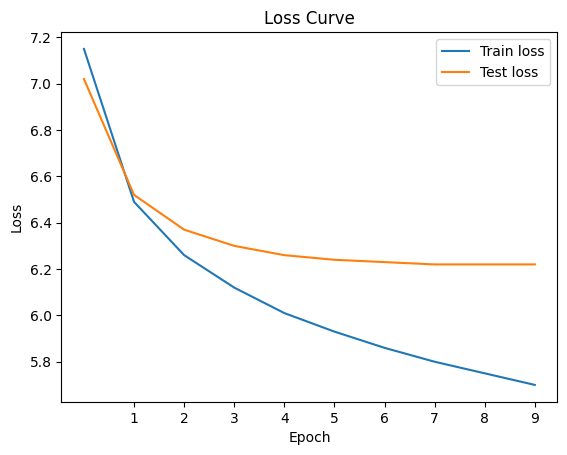

In [39]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(train_loss_lst, label='Train loss')
plt.plot(val_loss_lst, label='Test loss')
plt.xlabel('Epoch')
plt.xticks(np.arange(1,10))
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

## Result and Comparasion

In [ ]:
def get_popular_movies(df_ratings):
  # Calculate the number of ratings for each movie
  rating_counts = df_ratings['movie_id'].value_counts().reset_index()
  rating_counts.columns = ['movie_id', 'rating_count']

  # Get the most frequently rated movies
  min_ratings_threshold = rating_counts['rating_count'].quantile(0.95)

  # Filter movies based on the minimum number of ratings
  popular_movies = ratings.merge(rating_counts, on='movie_id')
  popular_movies = popular_movies[popular_movies['rating_count'] >= min_ratings_threshold]

  # Calculate the average rating for each movie
  average_ratings = popular_movies.groupby('movie_id')['rating'].mean().reset_index()

  # Get the top 10 rated movies
  top_10_movies = list(average_ratings.sort_values('rating', ascending=False).head(10).movie_id.values)
  return top_10_movies

In [ ]:
top_10_movies = get_popular_movies(ratings)

In [ ]:
# Movie id decoder
movie_vocab_itos = movie_vocab.get_itos()

# A placeholders to store results of recommendations
transformer_reco_results = list()
popular_reco_results = list()

# Get top 10 movies
k = 10
# Iterate over the validation data
for i, (movie_data, user_data) in enumerate(test_iter): 
    # Feed the input and get the outputs
    movie_data, user_data = movie_data.to(device), user_data.to(device)
    user_data = user_data.reshape(-1, 1)
    inputs, targets = movie_data[:, :-1], movie_data[:, 1:]
    output = model(inputs, user_data)
    output_flat = output.reshape(-1, ntokens)
    targets_flat = targets.reshape(-1)

    # Reshape the output_flat to get top predictions
    outputs = output_flat.reshape(output_flat.shape[0] // inputs.shape[1],
                                  inputs.shape[1],
                                  output_flat.shape[1])[: , -1, :]
    # k + inputs.shape[1] = 13 movies obtained
    # In order to prevent to recommend already watched movies
    values, indices = outputs.topk(k + inputs.shape[1], dim=-1)

    for sub_sequence, sub_indice_org in zip(movie_data, indices):
        sub_indice_org = sub_indice_org.cpu().detach().numpy()
        sub_sequence = sub_sequence.cpu().detach().numpy()

        # Generate mask array to eliminate already watched movies 
        mask = np.isin(sub_indice_org, sub_sequence[:-1], invert=True)

        # After masking get top k movies
        sub_indice = sub_indice_org[mask][:k]

        # Generate results array
        transformer_reco_result = np.isin(sub_indice, sub_sequence[-1]).astype(int)

        # Decode movie to search in popular movies
        target_movie_decoded = movie_vocab_itos[sub_sequence[-1]]
        popular_reco_result = np.isin(top_10_movies, target_movie_decoded).astype(int)

        transformer_reco_results.append(transformer_reco_result)
        popular_reco_results.append(popular_reco_result)

In [ ]:
from sklearn.metrics import ndcg_score

# Since we have already sorted our recommendations
# An array that represent our recommendation scores is used.
representative_array = [[i for i in range(k, 0, -1)]] * len(transformer_reco_results)

trans_score, popular_score = [], []
for k in range(1,10):
  transformer_result = ndcg_score(transformer_reco_results,
                                  representative_array, k=k)
  popular_result = ndcg_score(popular_reco_results,
                              representative_array, k=k)
  
  trans_score.append(transformer_result)
  popular_score.append(popular_result)
  print(f"Transformer NDCG result at top {k}: {round(transformer_result, 4)}")
  print(f"Popular recommendation NDCG result at top {k}: {round(popular_result, 4)}\n\n")

import matplotlib.pyplot as plt
plt.figure()
plt.plot(trans_score)
plt.plot(popular_result)
plt.xlabel('K')
plt.xticks(np.arange(1,10))
plt.ylabel('NDCG @ K')
plt.title('NDCG score comparison')
plt.show()